# Airline Passenger Satisfaction Analysis

## Table of Contents
1. [Project Overview](#project-overview)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Feature Engineering](#feature-engineering)
5. [Model Training](#model-training)
6. [Model Evaluation](#model-evaluation)

## Project Overview
This project analyzes airline passenger satisfaction using machine learning techniques. The goal is to predict passenger satisfaction based on various flight and service-related features.

## Data Preprocessing

### Data Loading and Initial Exploration

In [102]:
import numpy as np
import pandas as pd

In [103]:
df = pd.read_csv('train.csv')

#### Initial Data Exploration

In [104]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [105]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [107]:
df.shape

(103904, 25)

### Handling Missing Values

In [108]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

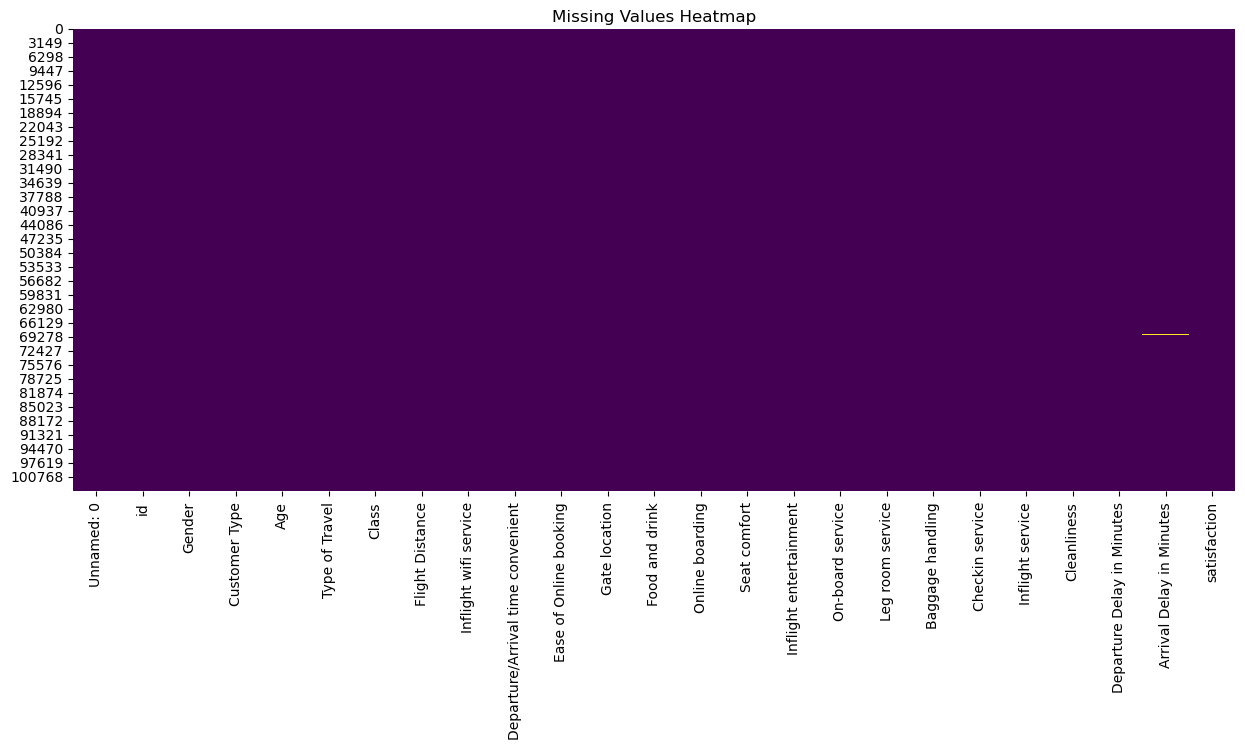

In [110]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [111]:
# Missing values percentage
percentage = missing_values / df.shape[0] * 100
percentage

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

So, only 0.2983 percent of the entire column is missing. Therefore we can easily drop them for convenience. Also `Unnamed: 0` and `id` columns doesn't add any values to the problem, so we'll drop them too.

In [112]:
df = df.dropna()
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [113]:
print(df['satisfaction'].isnull().sum())  # Should be 0
print(df['satisfaction'].dtype)  # Should be int or float (not object)
print(df['satisfaction'].unique())  # Should be numerical values like [0, 1]


0
object
['neutral or dissatisfied' 'satisfied']


### Feature Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = df.dropna()

cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
oh_col = ['Gender']

encoding_dict = {}
le = LabelEncoder()
oh = OneHotEncoder(sparse_output=False, drop='first')

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

encoded_data = oh.fit_transform(df[oh_col])
encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

df = df.drop(columns=oh_col).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

print("\nEncoding Mappings:")
for col, mapping in encoding_dict.items():
    print(f"{col}: {mapping}")

df.head()



Encoding Mappings:
Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}


,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male
0,0,13,1,2,460,3,4,3,1,5,...,4,3,4,4,5,5,25,18.0,0,1.0
1,1,25,0,0,235,3,2,3,3,1,...,1,5,3,1,4,1,1,6.0,0,1.0
2,0,26,0,0,1142,2,2,2,2,5,...,4,3,4,4,4,5,0,0.0,1,0.0
3,0,25,0,0,562,2,5,5,5,2,...,2,5,3,1,4,2,11,9.0,0,0.0
4,0,61,0,0,214,3,3,3,3,4,...,3,4,4,3,3,3,0,0.0,1,1.0


## Exploratory Data Analysis

### Visualization Techniques

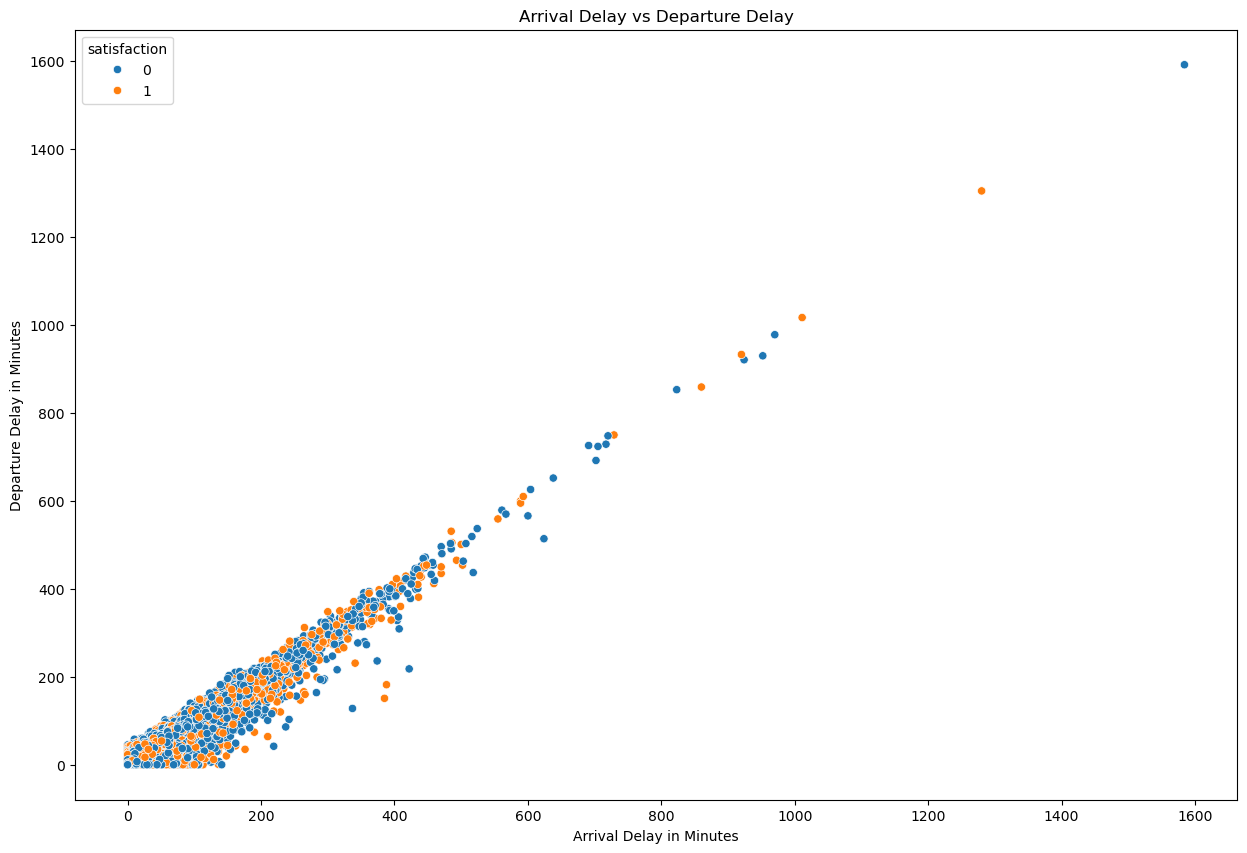

In [115]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Arrival Delay vs Departure Delay')
plt.show()

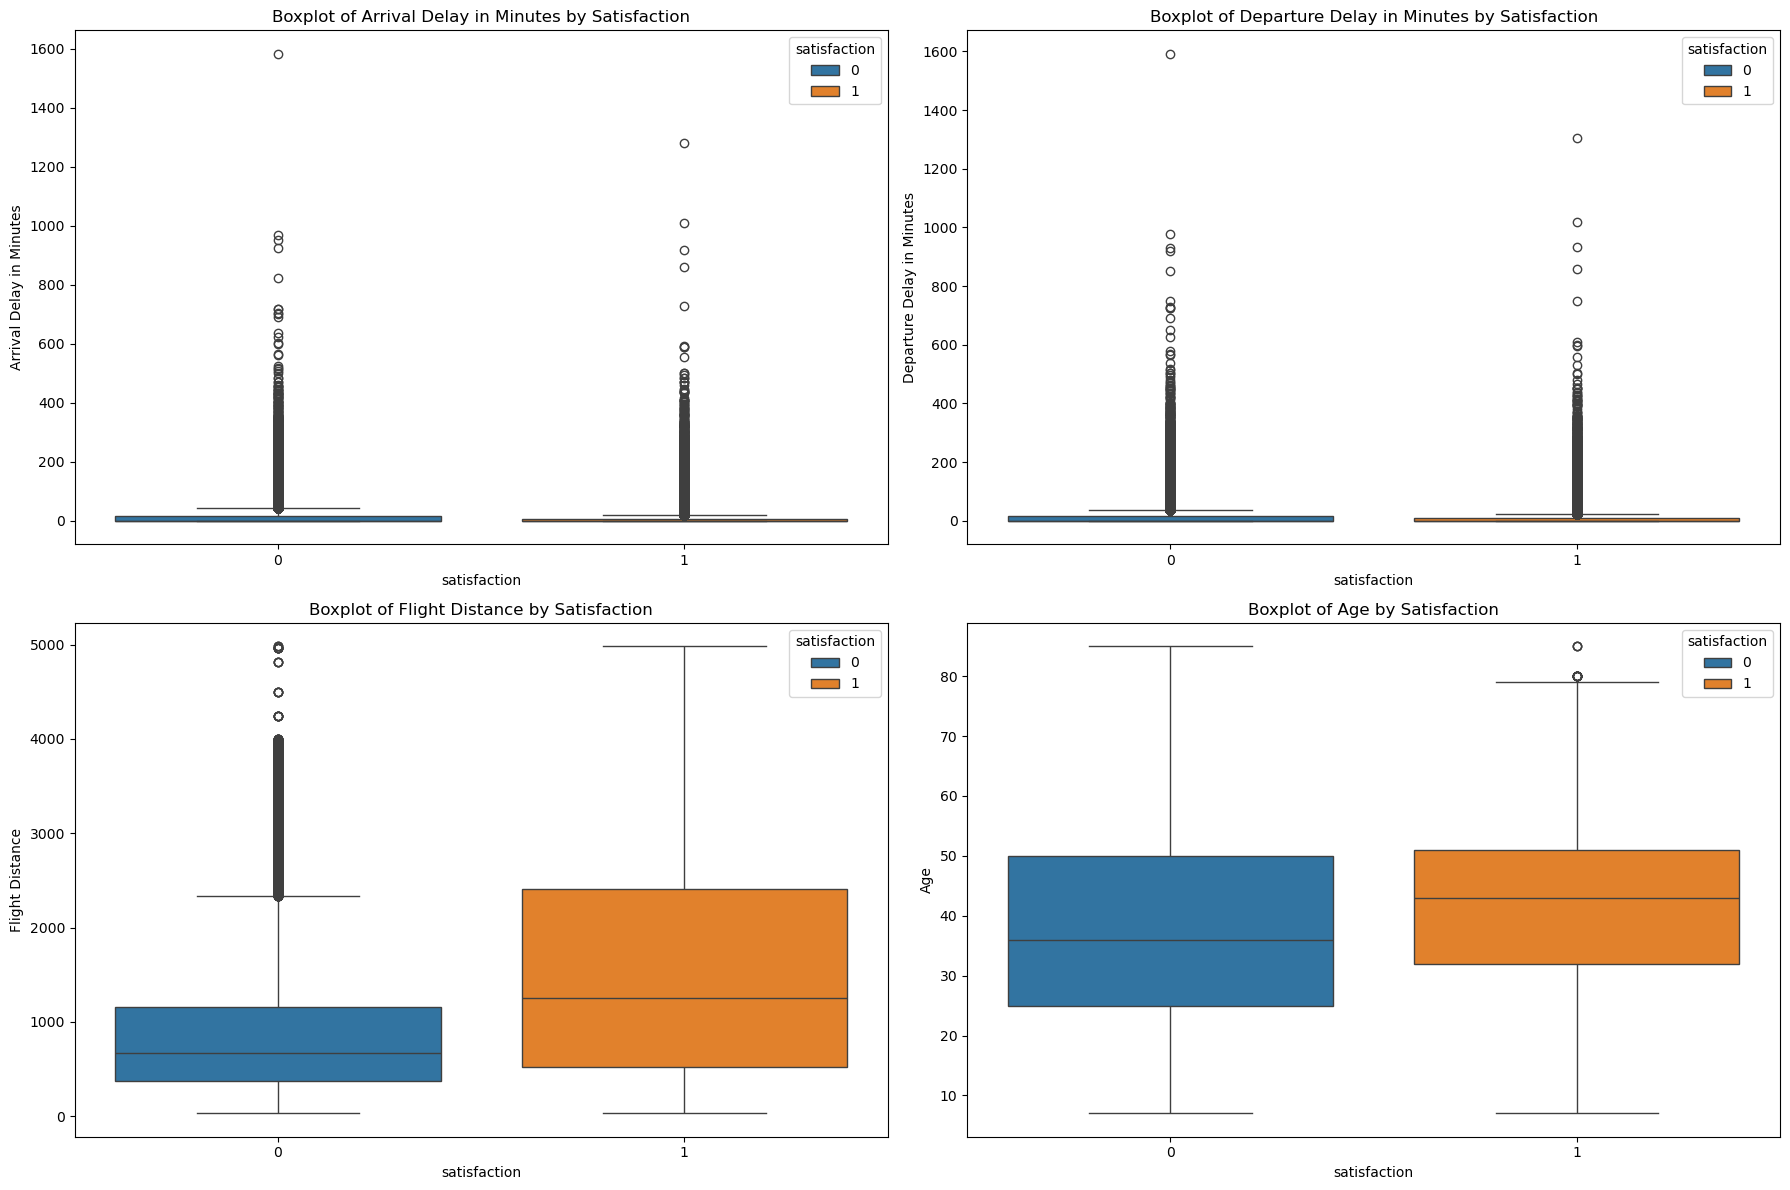

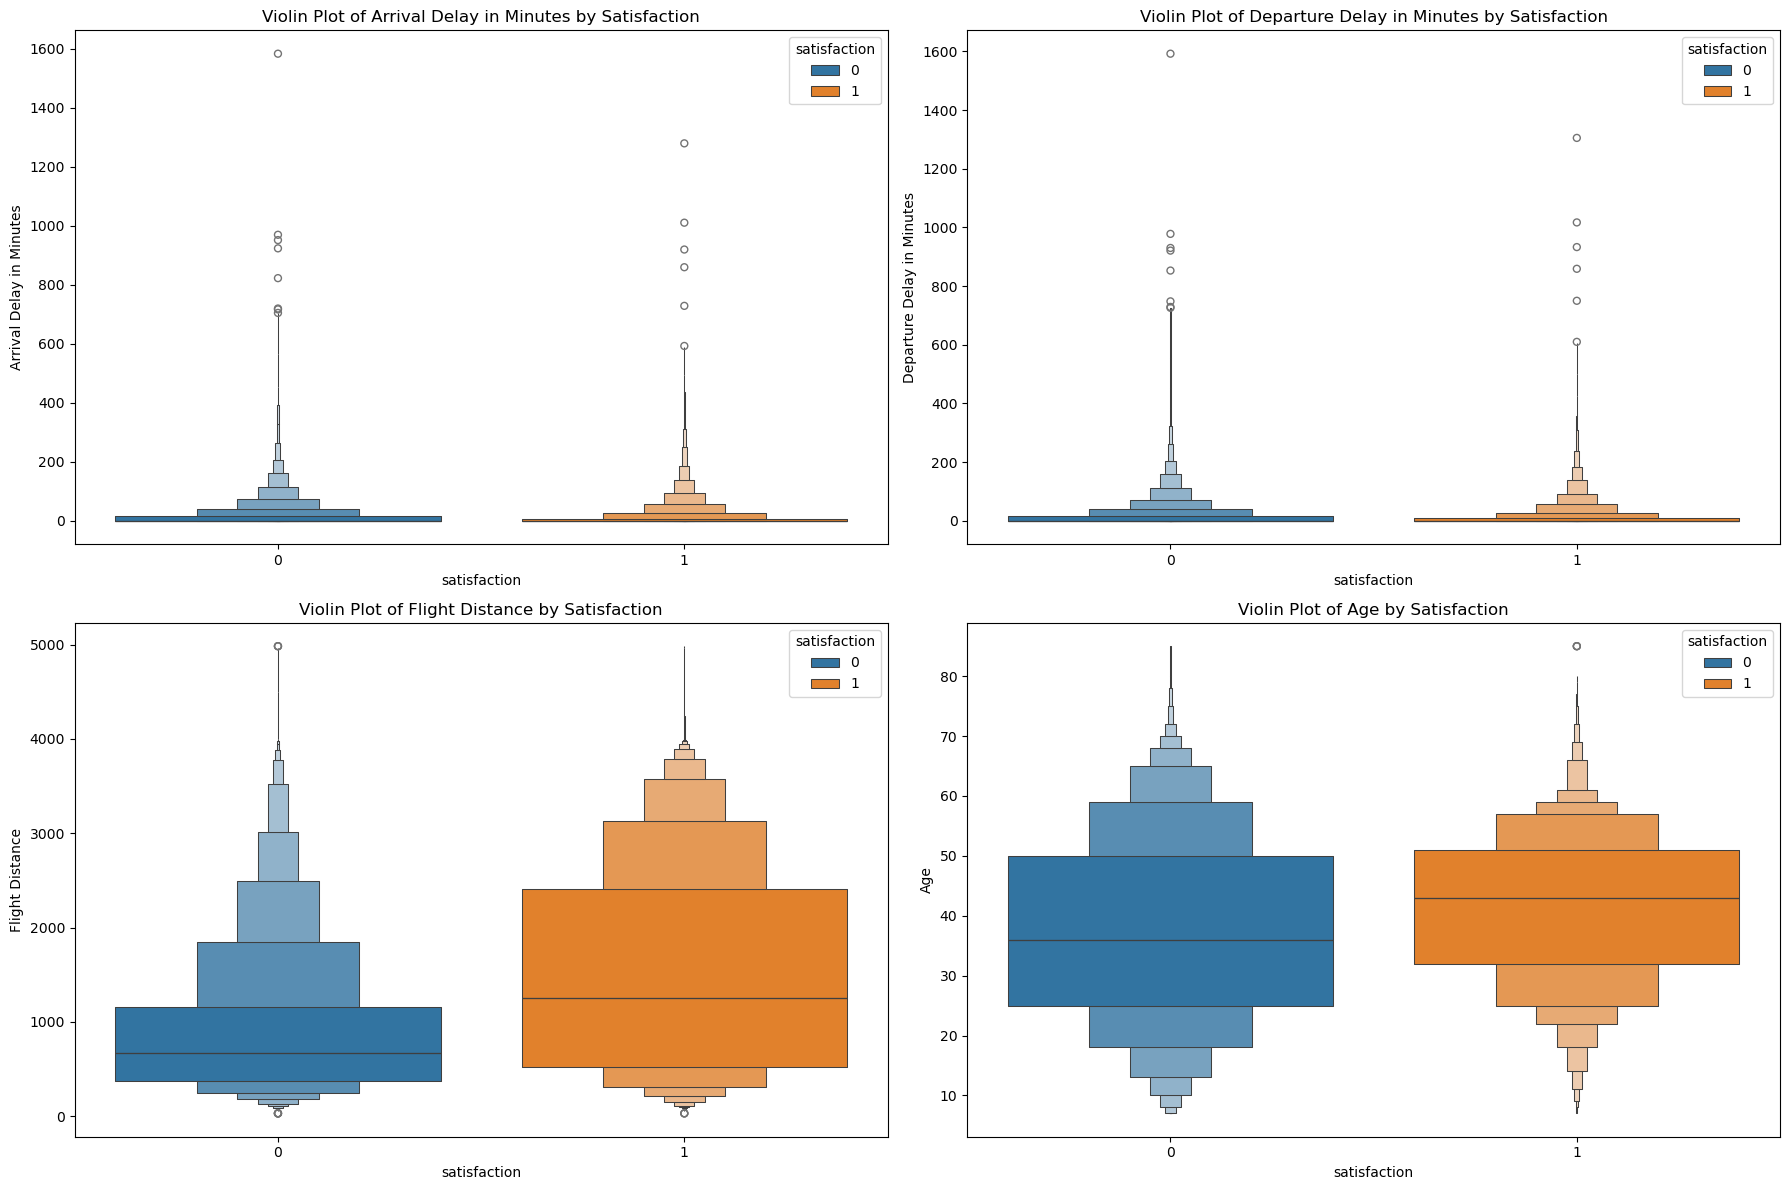

In [116]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]
plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Boxplot of {column} by Satisfaction')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 12))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='satisfaction', y=column, data=features, hue='satisfaction')
    plt.title(f'Violin Plot of {column} by Satisfaction')
plt.tight_layout()
plt.show()


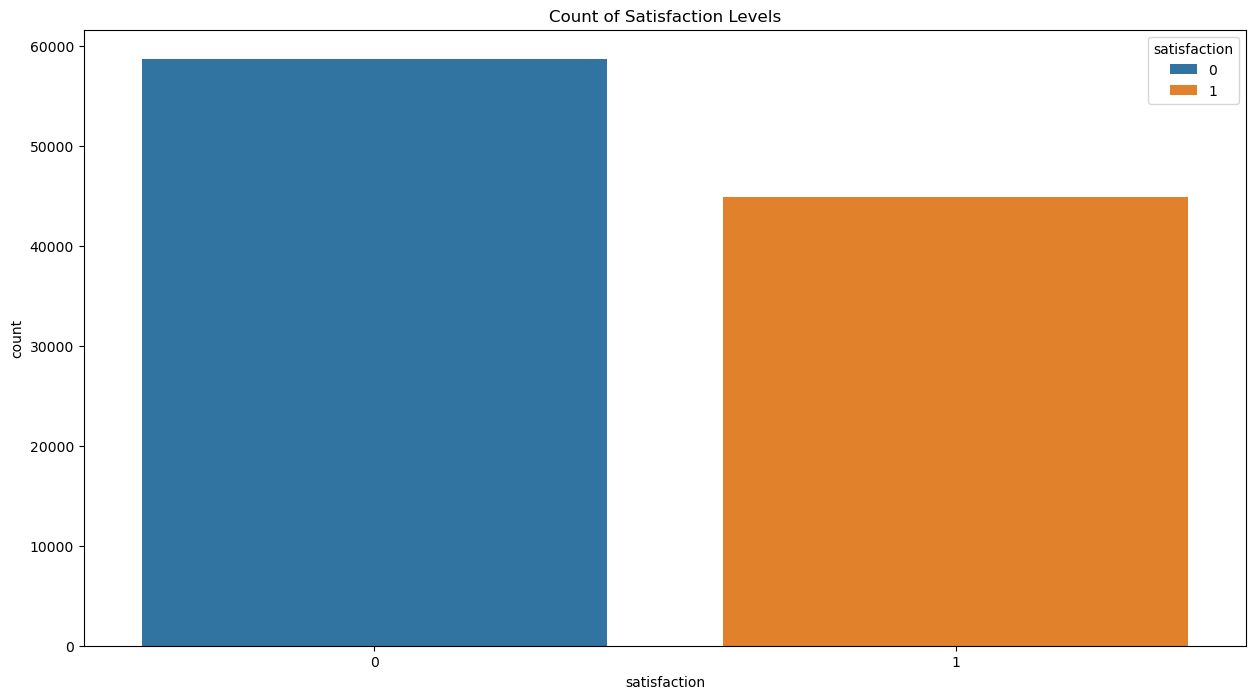

In [117]:
plt.figure(figsize=(15, 8))
sns.countplot(x='satisfaction', data=features, hue='satisfaction')
plt.title('Count of Satisfaction Levels')
plt.show()


### Distribution Analysis

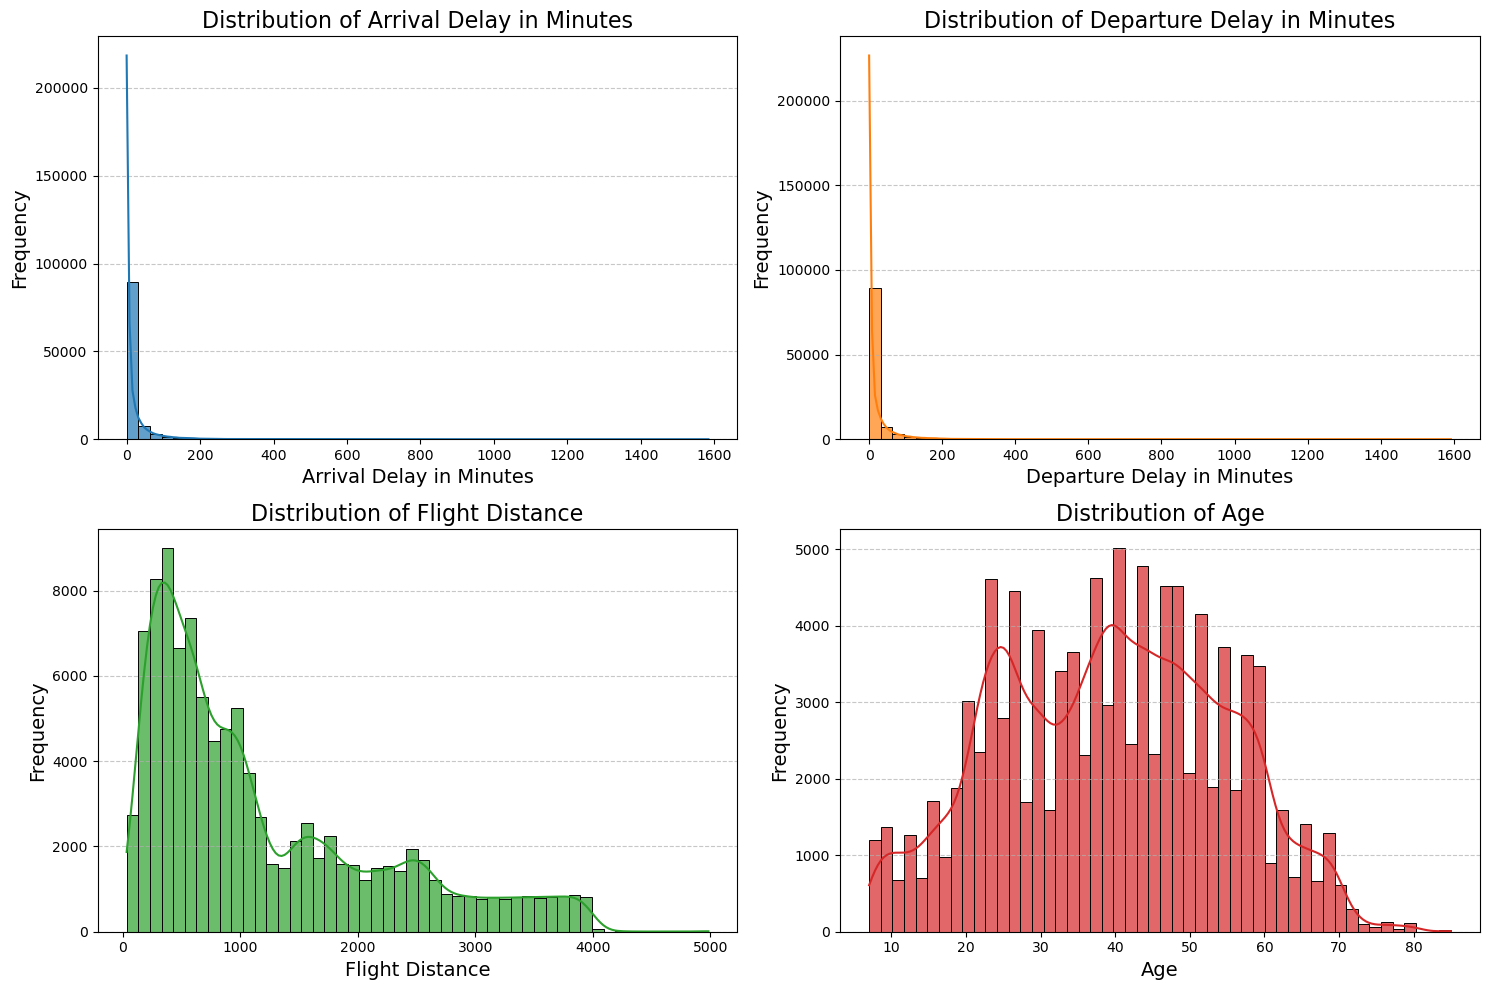

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette(n_colors=len(features.columns)-1)

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(features[column], kde=True, bins=50, color=palette[i-1], alpha=0.7)
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Observations:
- `Arrival Delay in Minutes`, `Departure Delay in Minutes` & `Flight Distance` columns are skewed.
- `Age` column needs to be binned.

In [119]:
# sns.pairplot(features, hue='satisfaction', diag_kind='kde', markers=["o", "o"])
# plt.suptitle('Pairplot with KDE and Different Markers', y=1.02)
# plt.show()

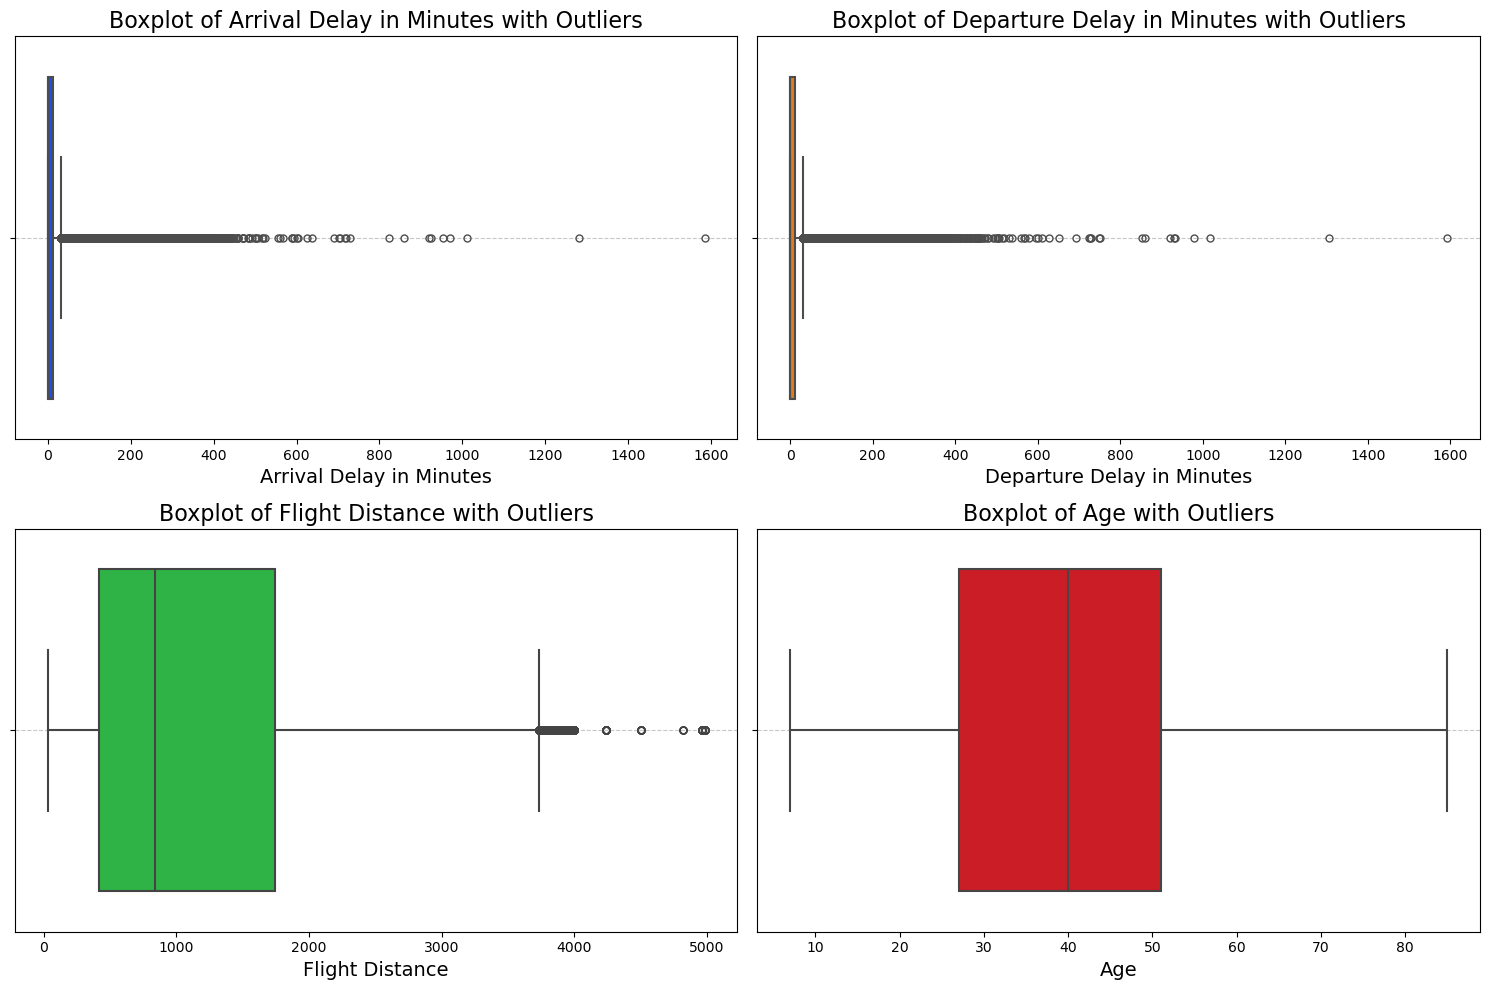

In [120]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [121]:
# features = df[['Class', 'Type of Travel', 'Seat comfort', 'Inflight entertainment', 'Online boarding', 'Customer Type', 'Inflight wifi service', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

In [122]:
# features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]

# sns.pairplot(features, hue='satisfaction')

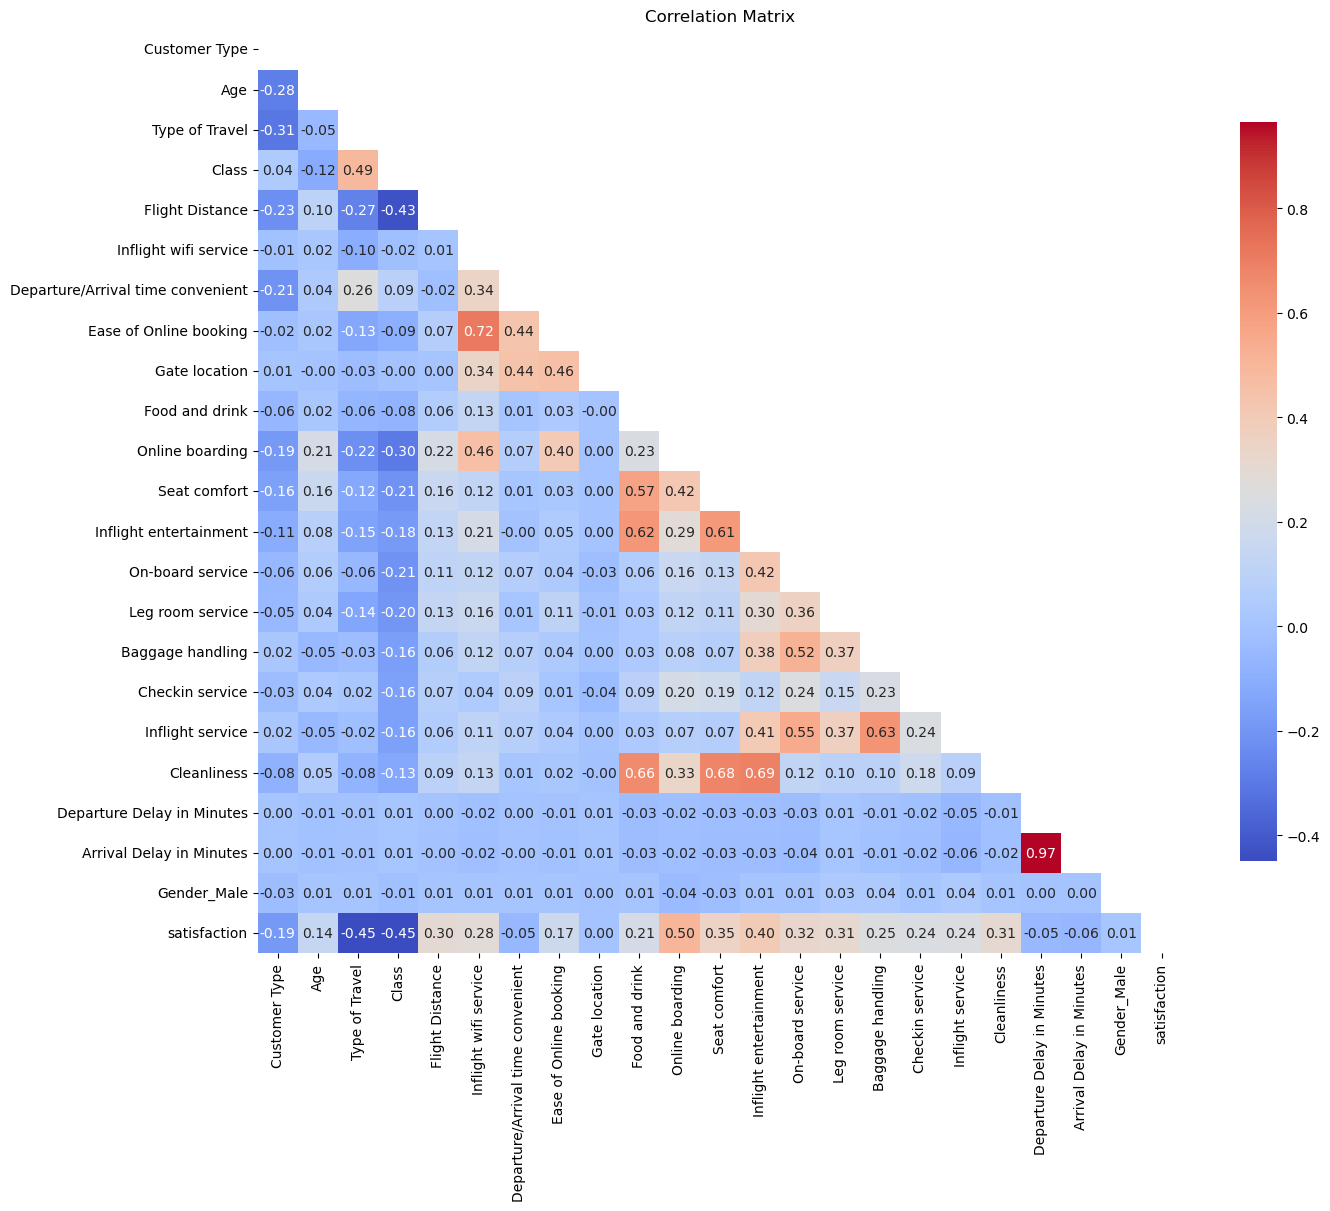

In [123]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [124]:
from sklearn.preprocessing import PowerTransformer

numerical_cols = df.select_dtypes(include=[np.number]).columns
skewed_cols = df[numerical_cols].apply(lambda x: x.skew()).abs()
skewed_cols = skewed_cols[skewed_cols > 0.5].index

def transform_skewed(df, method="log"):
    df_transformed = df.copy()
    
    if method == "log":
        for col in skewed_cols:
            df_transformed[col] = np.log1p(df_transformed[col])
    elif method == "sqrt":
        for col in skewed_cols:
            df_transformed[col] = np.sqrt(df_transformed[col])
    elif method == "yeo-johnson":
        pt = PowerTransformer(method="yeo-johnson")
        df_transformed[skewed_cols] = pt.fit_transform(df_transformed[skewed_cols])

    return df_transformed

df = transform_skewed(df, method="yeo-johnson")


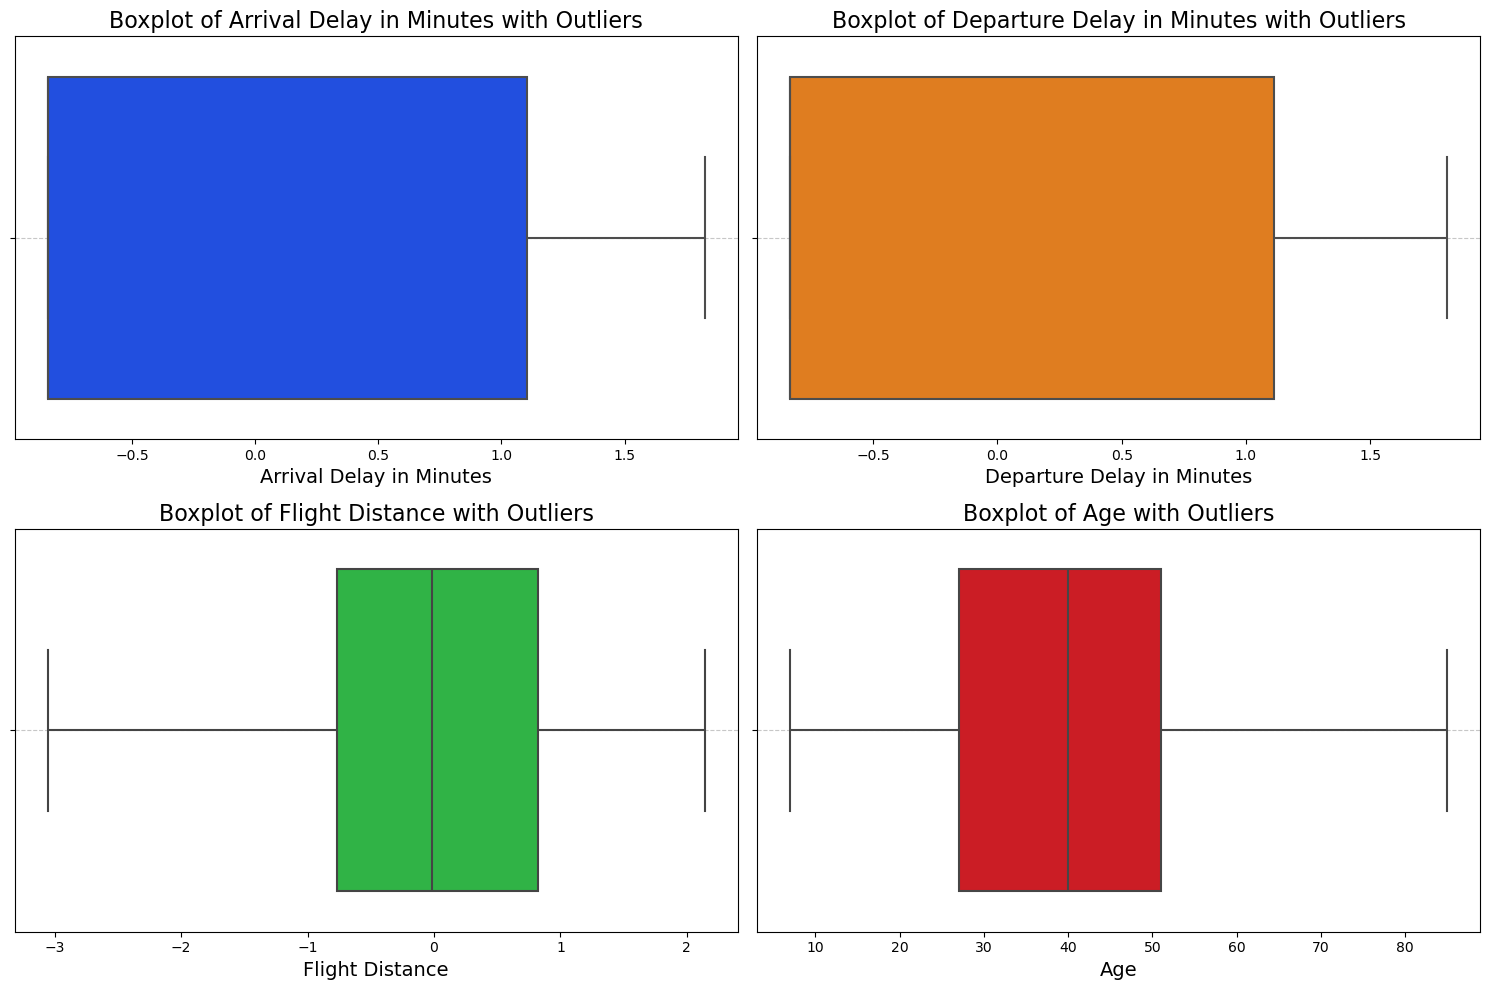

In [125]:
features = df[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'satisfaction']]


palette = sns.color_palette('bright', n_colors=len(features.columns)-1)

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))

plt.figure(figsize=(15, 10))
for i, column in enumerate(features.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=features[column], color=palette[i-1], fliersize=5, linewidth=1.5)
    plt.title(f'Boxplot of {column} with Outliers', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Feature Engineering


### Interaction Features


In [126]:
def get_high_correlation_features(df, target, threshold=0.5):
    corr_matrix = df.corr()
    high_corr_features = []

    target_corr = corr_matrix[target].drop(target)
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
    
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and abs(corr_matrix[col1][col2]) > threshold:
                high_corr_features.append((col1, col2))
    
    return selected_features, high_corr_features

# selected_features, feature_pairs = get_high_correlation_features(df, target="satisfaction", threshold=0.35)

In [127]:
df.columns.tolist()

['Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender_Male',
 'satisfaction']

In [128]:
def age_group(df):
    bins = [7, 18, 30, 40, 50, 60, 70, 80, 85]
    labels = ['7-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-85']
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df = df.drop(columns=['Age'])
    df = pd.get_dummies(df, columns=['age_group'], prefix='age')
    return df
df = age_group(df)

In [ ]:
from itertools import combinations

columns = df.columns.tolist()
new_columns = []

for feature1, feature2 in combinations(columns, 2):
    if feature1 != 'satisfaction' and feature2 != 'satisfaction':
        interaction_feature_name = f"{feature1}_x_{feature2}"
        new_column = (df[feature1] + df[feature2]) ** 4
        new_columns.append(pd.Series(new_column, name=interaction_feature_name))

df = pd.concat([df] + new_columns, axis=1)


C:\Users\rafiq\AppData\Local\Temp\ipykernel_3808\448366994.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[interaction_feature_name] = (df[feature1] + df[feature2]) ** 4
C:\Users\rafiq\AppData\Local\Temp\ipykernel_3808\448366994.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[interaction_feature_name] = (df[feature1] + df[feature2]) ** 4
C:\Users\rafiq\AppData\Local\Temp\ipykernel_3808\448366994.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [130]:
def remove_high_collinearity(df, threshold=0.90):
    correlation_matrix = df.corr().abs()
    
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced

df = remove_high_collinearity(df, 0.85)

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

baseline_model = LogisticRegression(random_state=42, max_iter=100000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print(f"Baseline Model ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Baseline Model Accuracy: 0.9351
Baseline Model ROC AUC: 0.9836

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11740
           1       0.94      0.91      0.92      8979

    accuracy                           0.94     20719
   macro avg       0.94      0.93      0.93     20719
weighted avg       0.94      0.94      0.93     20719



In [132]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score

# cb_params = {'iterations': 476, 'learning_rate': 0.043757186100119284, 'depth': 10, 'l2_leaf_reg': 3.398402305277832}
# lgbm_params = {'max_depth': 7, 'num_leaves': 22, 'min_child_samples': 46, 'learning_rate': 0.04350246077224649, 'n_estimators': 414, 'reg_alpha': 0.0014685550686857323, 'reg_lambda': 3.957000009512791e-07, 'colsample_bytree': 0.9454161549874134, 'subsample': 0.5489656119013585, 'is_unbalance': False}
# xgb_params = {'max_depth': 15, 'learning_rate': 0.02270892971085817, 'min_child_weight': 1.4634453655046655, 'subsample': 0.9411317654956244, 'colsample_bytree': 0.9217563542510374, 'gamma': 2.061375285385118, 'n_estimators': 345}
models = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}

predictions = {}
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")
    model.fit(X_train, y_train)
    
    predictions[name] = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions[name], digits=3))


--------------------------------------------------
XGBoost Results:
Accuracy: 0.9614
ROC AUC: 0.9594
R2 Score: 0.8428

Classification Report:
              precision    recall  f1-score   support

           0      0.958     0.974     0.966     11740
           1      0.965     0.945     0.955      8979

    accuracy                          0.961     20719
   macro avg      0.962     0.959     0.961     20719
weighted avg      0.961     0.961     0.961     20719


--------------------------------------------------
LightGBM Results:
Accuracy: 0.9632
ROC AUC: 0.9606
R2 Score: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.980     0.968     11740
           1      0.973     0.941     0.957      8979

    accuracy                          0.963     20719
   macro avg      0.965     0.961     0.962     20719
weighted avg      0.963     0.963     0.963     20719


--------------------------------------------------
CatBoos

In [133]:
models_comparison = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [accuracy_score(y_test, predictions[model]) for model in models.keys()],
    'ROC AUC': [roc_auc_score(y_test, predictions[model]) for model in models.keys()],
    'R2 score': [r2_score(y_test, predictions[model]) for model in models.keys()]
})
models_comparison = models_comparison.sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("Models Comparison:")
print(models_comparison.to_string(index=False))


Models Comparison:
   Model  Accuracy  ROC AUC  R2 score
CatBoost  0.964622 0.962443  0.855929
LightGBM  0.963174 0.960590  0.850032
 XGBoost  0.961388 0.959433  0.842760


In [134]:
# from sklearn.model_selection import StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# accuracy_list, roc_auc_list = [], []
# for train_idx, test_idx in cv.split(X, y):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
    
#     accuracy_list.append(accuracy_score(y_test, predictions))
#     roc_auc_list.append(roc_auc_score(y_test, predictions))

# print("Cross-Validation Results:")
# print(f"Accuracy: {np.mean(accuracy_list):.4f} ± {np.std(accuracy_list):.4f}")
# print(f"ROC AUC: {np.mean(roc_auc_list):.4f} ± {np.std(roc_auc_list):.4f}")

{'learning_rate': 0.05520549356264246, 'max_depth': 5, 'num_leaves': 45, 'min_child_samples': 79, 'subsample': 0.6999363996765646, 'colsample_bytree': 0.7163094033242916, 'reg_alpha': 0.04993791802449747, 'reg_lambda': 0.004242849258963626, 'min_child_weight': 2, 'num_boost_round': 133}

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

if hasattr(X_train, 'values'):
    X_train_values = X_train.values
    X_test_values = X_test.values
    if hasattr(y_train, 'values'):
        y_train_values = y_train.values
        y_test_values = y_test.values
    else:
        y_train_values = y_train
        y_test_values = y_test
else:
    X_train_values = X_train
    X_test_values = X_test
    y_train_values = y_train
    y_test_values = y_test

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42,
        'objective': 'binary:logistic'
    }
    
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    
    for train_index, val_index in skf.split(X_train_values, y_train_values):
        X_fold_train = X_train_values[train_index]
        y_fold_train = y_train_values[train_index]
        X_fold_val = X_train_values[val_index]
        y_fold_val = y_train_values[val_index]
        
        dtrain = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval = xgb.DMatrix(X_fold_val, label=y_fold_val)
        
        evallist = [(dval, 'validation')]
        
        model = xgb.train(
            params=param,
            dtrain=dtrain,
            num_boost_round=n_estimators,
            evals=evallist,
            early_stopping_rounds=20,
            verbose_eval=False
        )
        
        y_pred_proba = model.predict(xgb.DMatrix(X_fold_val))
        y_pred = (y_pred_proba > 0.5).astype(int)
        acc = accuracy_score(y_fold_val, y_pred)
        scores.append(acc)
    
    return np.mean(scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

best_params = study.best_params.copy()

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_values, y_train_values, test_size=0.2, random_state=42
)

dtrain_final = xgb.DMatrix(X_train_final, label=y_train_final)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test_values, label=y_test_values)

print("Training final model with best parameters...")
evallist = [(dtrain_final, 'train'), (dval, 'validation')]

final_model = xgb.train(
    params=best_params,
    dtrain=dtrain_final,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=100
)

print(f"Best iteration: {final_model.best_iteration}")

y_pred_proba = final_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

print("Test set evaluation:")
print("Accuracy:", accuracy_score(y_test_values, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_values, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_values, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test_values, y_pred_proba))

evals_result = {}
final_model = xgb.train(
    params=best_params,
    dtrain=dtrain_final,
    num_boost_round=1000,
    evals=evallist,
    early_stopping_rounds=20,
    evals_result=evals_result,
    verbose_eval=False
)
# This took 18 minutes to run

[I 2025-03-27 00:33:40,180] A new study created in memory with name: no-name-b01ab2f7-2c33-4728-8185-826b73055d65
[I 2025-03-27 00:33:42,746] Trial 0 finished with value: 0.9565991305749442 and parameters: {'max_depth': 13, 'learning_rate': 0.05863353093033477, 'min_child_weight': 3.1028571707674675, 'subsample': 0.7486824835067534, 'colsample_bytree': 0.6898273899055226, 'gamma': 4.544747681657611, 'n_estimators': 790}. Best is trial 0 with value: 0.9565991305749442.
[I 2025-03-27 00:33:43,543] Trial 1 finished with value: 0.9516750342330724 and parameters: {'max_depth': 6, 'learning_rate': 0.4209706844858965, 'min_child_weight': 16.476442672603653, 'subsample': 0.9384414479780725, 'colsample_bytree': 0.755934331260365, 'gamma': 4.066339043911247, 'n_estimators': 319}. Best is trial 0 with value: 0.9565991305749442.
[I 2025-03-27 00:33:44,646] Trial 2 finished with value: 0.9546198535154327 and parameters: {'max_depth': 13, 'learning_rate': 0.17261812756106895, 'min_child_weight': 1.4

In [135]:
# import numpy as np
# import pandas as pd
# import lightgbm as lgb
# import optuna
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import (
#     accuracy_score, 
#     classification_report, 
#     roc_auc_score, 
#     precision_recall_curve, 
#     average_precision_score
# )

# def preprocess_data(X, y, test_size=0.2, random_state=42):
#     return train_test_split(
#         X, y, 
#         test_size=test_size, 
#         stratify=y, 
#         random_state=random_state
#     )

# def objective_lgb(trial, X_train, y_train):
#     params = {
#         'objective': 'binary',
#         'metric': 'auc',
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'num_leaves': trial.suggest_int('num_leaves', 10, 100),
#         'min_child_samples': trial.suggest_int('min_child_samples', 20, 200),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
#         'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'is_unbalance': trial.suggest_categorical('is_unbalance', [True, False]),
#         'boosting_type': 'gbdt'
#     }
    
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', lgb.LGBMClassifier(
#             **params, 
#             random_state=42, 
#             n_jobs=-1
#         ))
#     ])
    
#     scores = cross_val_score(
#         pipeline, 
#         X_train, 
#         y_train, 
#         cv=cv, 
#         scoring='balanced_accuracy',
#         n_jobs=-1
#     )
    
#     return np.mean(scores)

# def train_lightgbm(X_train, y_train, n_trials=100):
#     study = optuna.create_study(direction='maximize')
    
#     study.optimize(
#         lambda trial: objective_lgb(trial, X_train, y_train), 
#         n_trials=n_trials
#     )
    
#     best_params = study.best_params
#     print("Best Parameters:", best_params)
    
#     final_pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('classifier', lgb.LGBMClassifier(
#             **best_params, 
#             random_state=42, 
#             n_jobs=-1
#         ))
#     ])
    
#     final_pipeline.fit(X_train, y_train)
    
#     return best_params, final_pipeline

# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
    
#     metrics = {
#         'accuracy': accuracy_score(y_test, y_pred),
#         'roc_auc': roc_auc_score(y_test, y_pred_proba),
#         'avg_precision': average_precision_score(y_test, y_pred_proba),
#         'classification_report': classification_report(y_test, y_pred)
#     }
    
#     return metrics

# def plot_feature_importance(model, feature_names):
#     importances = model.named_steps['classifier'].feature_importances_
#     indices = np.argsort(importances)[::-1]
    
#     plt.figure(figsize=(10, 6))
#     plt.title("Feature Importances")
#     plt.bar(range(len(importances)), importances[indices])
#     plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
#     plt.tight_layout()
#     plt.show()

# def plot_precision_recall_curve(y_test, y_pred_proba):
#     precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    
#     plt.figure(figsize=(8, 6))
#     plt.plot(recall, precision, marker='.')
#     plt.title('Precision-Recall Curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.show()

# def main(X, y, feature_names, trials=100):
#     X_train, X_test, y_train, y_test = preprocess_data(X, y)
#     best_params, model = train_lightgbm(X_train, y_train, trials)
    
#     metrics = evaluate_model(model, X_test, y_test)
    
#     print("\nModel Performance:")
#     for key, value in metrics.items():
#         print(f"{key}: {value}")
    
#     plot_feature_importance(model, feature_names)
#     plot_precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    
#     return model, metrics, best_params

# feature_names = df.columns.tolist()
# model, metrics, best_params = main(X, y, feature_names, trials=500)


In [136]:
# import shap

# X = df.drop(columns=["satisfaction"])
# y = df["satisfaction"]
# X = pd.get_dummies(X, drop_first=True)

# model = lgb.LGBMClassifier() if y.nunique() > 2 else lgb.LGBMRegressor()
# model.fit(X, y)

# explainer = shap.Explainer(model, X)
# shap_values = explainer(X)

# plt.figure(figsize=(15, 10))
# shap.summary_plot(shap_values, X)

# plt.figure(figsize=(15, 10))
# shap.summary_plot(shap_values, X, plot_type="bar")

# plt.figure(figsize=(15, 10))
# shap.plots.waterfall(shap_values[0])

In [137]:
def full_pipeline(df):

    from sklearn.preprocessing import LabelEncoder, OneHotEncoder

    df = df.dropna()
    df = df.drop(columns=['Unnamed: 0', 'id'])

    cat_cols = ['Type of Travel', 'Customer Type', 'Class', 'satisfaction']
    oh_col = ['Gender']

    encoding_dict = {}
    le = LabelEncoder()
    oh = OneHotEncoder(sparse_output=False, drop='first')

    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))
        encoding_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))

    encoded_data = oh.fit_transform(df[oh_col])
    encoded_df = pd.DataFrame(encoded_data, columns=oh.get_feature_names_out(oh_col))

    df = df.drop(columns=oh_col).reset_index(drop=True)
    df = pd.concat([df, encoded_df], axis=1)

    selected_features, _ = get_high_correlation_features(df, target="satisfaction", threshold=0.35)

    columns = selected_features

    for feature1, feature2 in combinations(columns, 2):
        interaction_feature_name = f"{feature1}_x_{feature2}"
        df[interaction_feature_name] = df[feature1] * df[feature2]

    df = remove_high_collinearity(df, 0.85)
    return df

In [138]:
test_df = pd.read_csv('test.csv')
test_df = full_pipeline(test_df)
X = test_df.drop(columns=['satisfaction'])
y = test_df['satisfaction']
X.head()
# predictions = model.predict(X)
# accuracy_score(y, predictions)
# roc_auc_score(y, predictions)

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Class_x_Online boarding,Class_x_Inflight entertainment,Online boarding_x_Inflight entertainment
0,0,52,0,1,160,5,4,3,4,3,...,5,5,2,5,5,50,0.0,4,5,20
1,0,36,0,0,2863,1,1,3,1,5,...,4,4,3,4,5,0,0.0,0,0,16
2,1,20,0,1,192,2,0,2,4,2,...,1,3,2,2,2,0,1.0,2,2,4
3,0,44,0,0,3377,0,0,0,2,3,...,1,1,3,1,4,0,1.0,0,0,4
4,0,49,0,1,1182,2,3,4,3,4,...,2,2,4,2,4,0,0.0,1,2,2


## Conclusion
The analysis provides insights into factors affecting passenger satisfaction and demonstrates the effectiveness of various machine learning models in predicting satisfaction levels.


## Key Findings
- Feature importance analysis
- Model performance comparison
- Insights into key drivers of passenger satisfaction


## Recommendations
1. Focus on reducing delays
2. Improve in-flight services
3. Enhance customer experience based on key features


## Technologies Used
- Python
- Pandas
- NumPy
- Scikit-learn
- XGBoost
- LightGBM
- CatBoost
- Seaborn
- Matplotlib